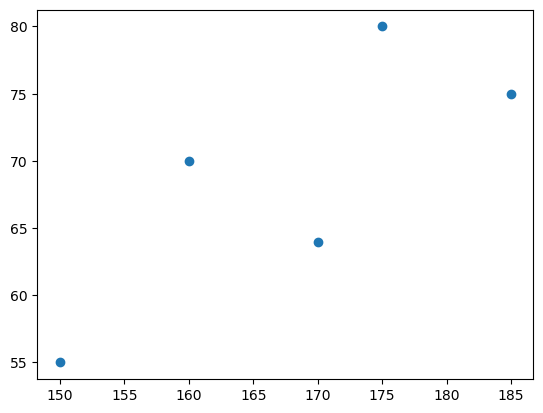

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
plt.plot(x,y,'o')# o는 점으로 표시

[140.         140.50505051 141.01010101 141.51515152 142.02020202
 142.52525253 143.03030303 143.53535354 144.04040404 144.54545455
 145.05050505 145.55555556 146.06060606 146.56565657 147.07070707
 147.57575758 148.08080808 148.58585859 149.09090909 149.5959596
 150.1010101  150.60606061 151.11111111 151.61616162 152.12121212
 152.62626263 153.13131313 153.63636364 154.14141414 154.64646465
 155.15151515 155.65656566 156.16161616 156.66666667 157.17171717
 157.67676768 158.18181818 158.68686869 159.19191919 159.6969697
 160.2020202  160.70707071 161.21212121 161.71717172 162.22222222
 162.72727273 163.23232323 163.73737374 164.24242424 164.74747475
 165.25252525 165.75757576 166.26262626 166.76767677 167.27272727
 167.77777778 168.28282828 168.78787879 169.29292929 169.7979798
 170.3030303  170.80808081 171.31313131 171.81818182 172.32323232
 172.82828283 173.33333333 173.83838384 174.34343434 174.84848485
 175.35353535 175.85858586 176.36363636 176.86868687 177.37373737
 177.87878788

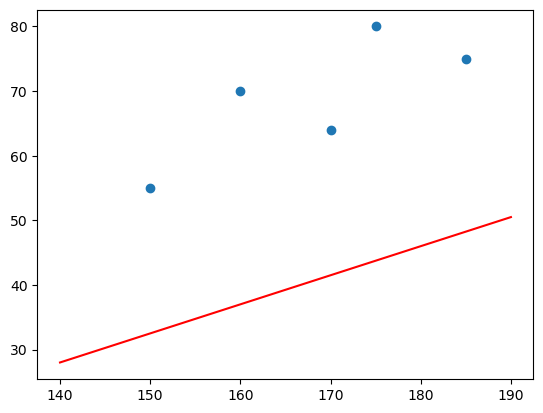

In [4]:
a = 0.45
b = -35
x_plot=np.linspace(140,190,100)# 145부터 190까지 100개의 점을 찍어라
# 균일한 간격으로 숫자가 채워짐
y_plot=a * x_plot + b# y=ax+b
print(x_plot)# 140부터 190까지 100개의 숫자가 채워짐
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

optimal a = [0.56262626]
optimal b = [-25.75757576]


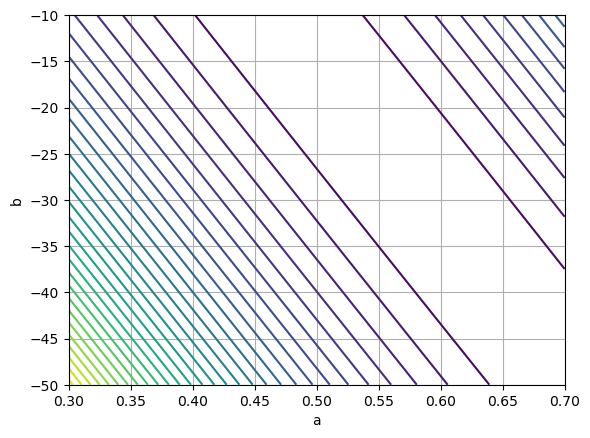

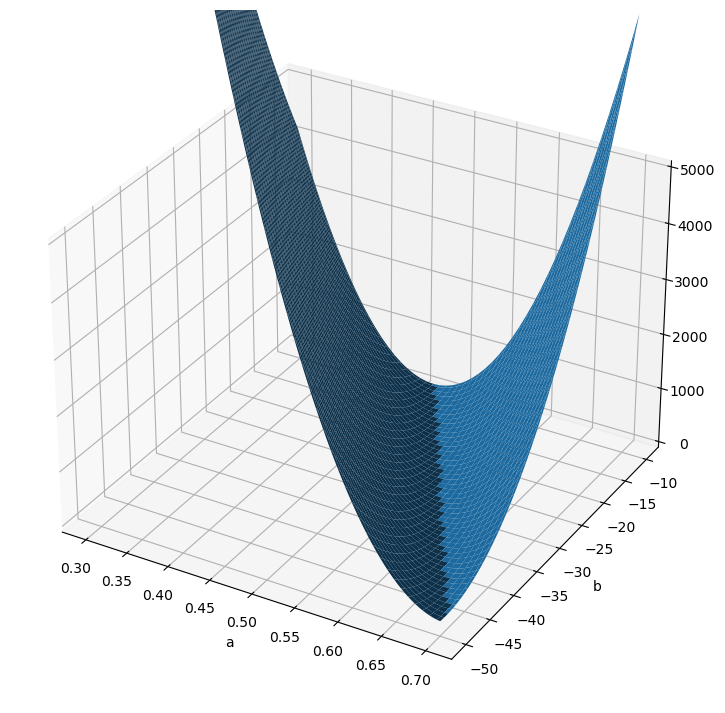

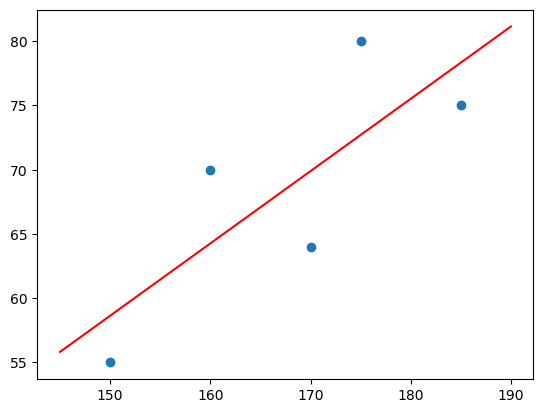

In [17]:
a = 0.5 + np.linspace(-0.2,0.2,100)# ((-0.2부터 0.2) + 0.5)까지 100개의 숫자가 채워짐
b = -30 + np.linspace(-20,20,100)# ((-20부터 20))-30까지 100개의 숫자가 채워짐

A, B = np.meshgrid(a,b)# a,b를 가지고 meshgrid를 만들어라

L=np.zeros_like(A)# A와 같은 크기의 0으로 채워진 행렬을 만들어라
# zeros_like = 
for i in range(5):
    L += (y[i] - (A*x[i]+B))**2

# L=np.zeros((len(b),len(a)))
# for i in range(len(b)):
#     for j in range(len(a)):
#         for n in range(len(x)):
#             L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i]))**2

plt.contour(a,b,L,30)# 등고선을 그려라
plt.xlabel('a'); plt.ylabel('b'); plt.grid()# x축은 a, y축은 b, 그리드를 그려라

plt.figure(figsize=[10, 9])# 그림의 크기를 10,9로 만들어라 
ax = plt.axes(projection="3d")# 3차원 그래프를 그려라
ax.plot_surface(A,B,L);# A,B,L을 가지고 3차원 그래프를 그려라
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0, 5000])

a_opt = A[L==np.min(L)]# L이 최소인 a를 찾아라
b_opt = B[L==np.min(L)]# L이 최소인 b를 찾아라
print(f"optimal a = {a_opt}")# 최적의 a값을 출력해라
print(f"optimal b = {b_opt}")

plt.figure()
x_plot=np.linspace(145,190,100)#    
y_plot=a_opt * x_plot + b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

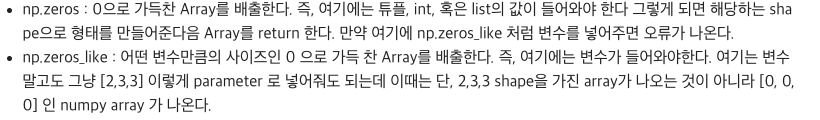

In [16]:
print(np.zeros((3,4)),type(np.zeros((3,4))))
print(np.zeros_like(np.array([[1,2,3,2],[4,1,5,6],[7,3,8,9]])),
      type(np.zeros_like(np.array([[1,2,3,2],[4,1,5,6],[7,3,8,9]]))))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] <class 'numpy.ndarray'>
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] <class 'numpy.ndarray'>


tensor(0.4500, requires_grad=True) tensor(-35., requires_grad=True)
tensor(-47545.)
tensor(-282.)
tensor(0.4975) tensor(-34.9997)


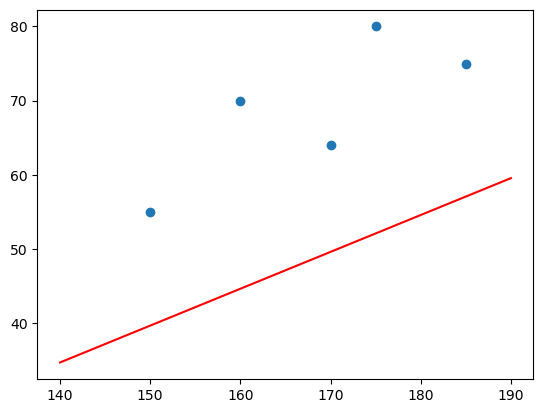

In [6]:
import torch
a = torch.tensor(0.45, requires_grad=True)# requires_grad=True는 미분을 계산하겠다는 의미
b = torch.tensor(-35.0, requires_grad=True)
# requires_grad=True means that we want to compute the gradient of the output with respect to this tensor during the backward pass

print(a,b)

L=0
for i in range(5):
    L += (y[i] - (a*x[i]+b))**2# L = (y-(ax+b))^2 -> Loss function

L.backward()# 역전파 시작
print(a.grad)# dL/da
print(b.grad)# dL/db

LR = 1e-6# learning rate
a=a.detach()-LR*a.grad# a = a - LR*dL/da
# why we use detach()? -> detach() is used to detach the output from the computation graph
b=b.detach()-LR*b.grad# b = b - LR*dL/db
print(a,b)


y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,'r')

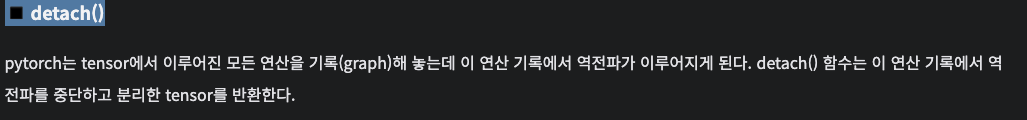

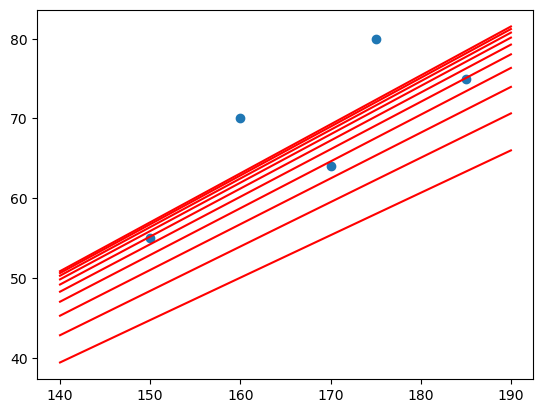

In [7]:
EPOCH=10# 10번 반복
LR = 1e-6#  learning rate
plt.plot(x,y,'o')# x,y를 점으로 표시
for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2# L+=(y-ax+b)^2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    y_plot=a * x_plot + b
    plt.plot(x_plot,y_plot,'r')

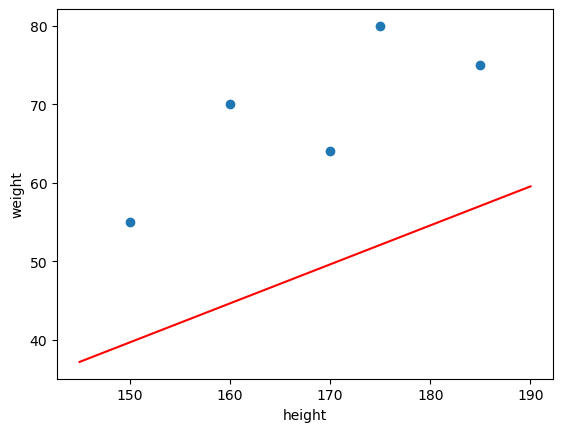

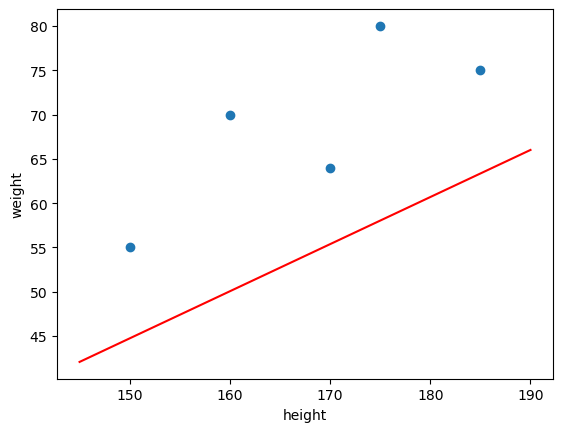

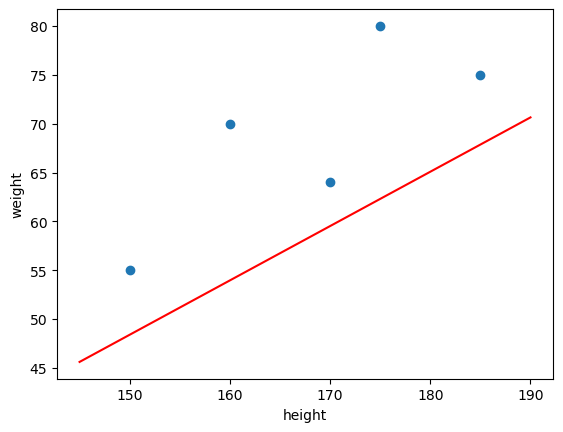

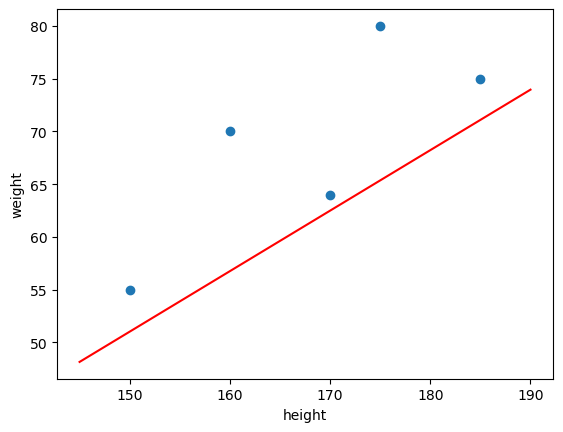

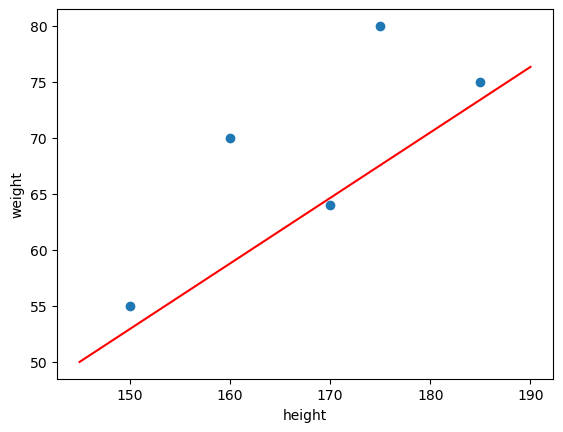

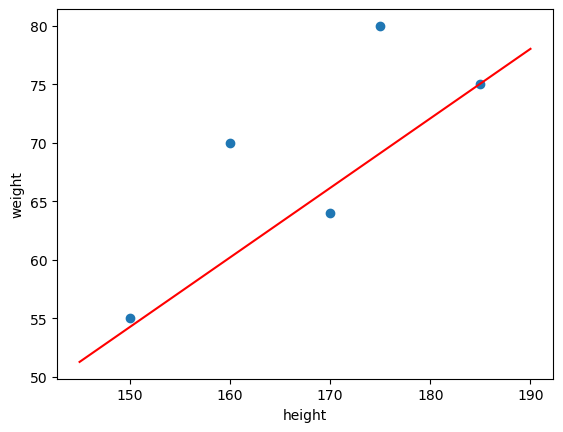

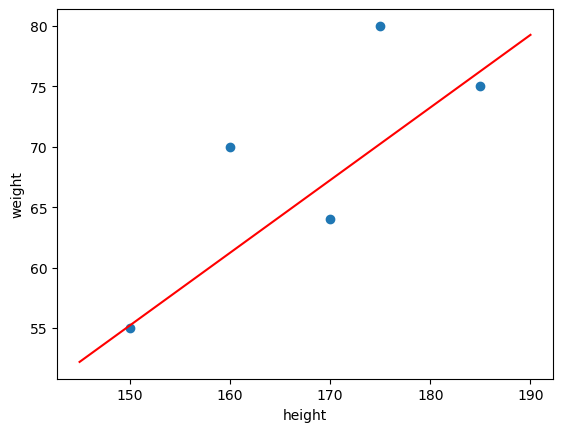

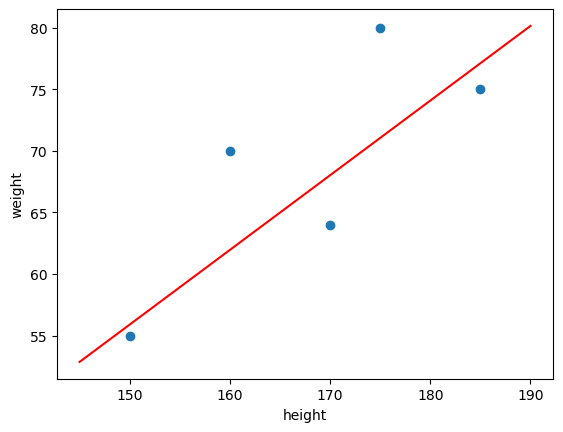

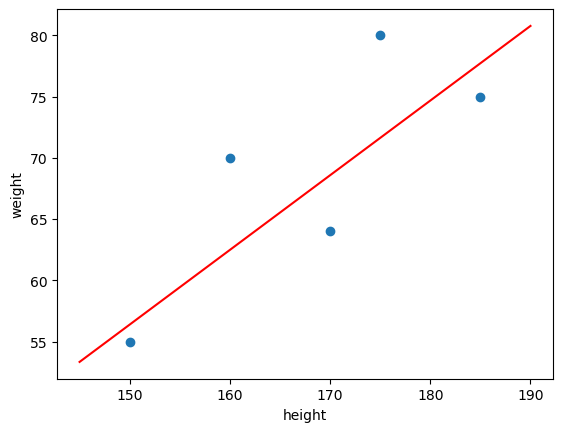

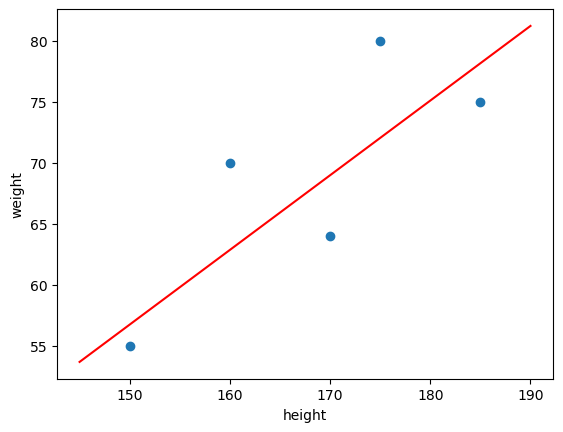

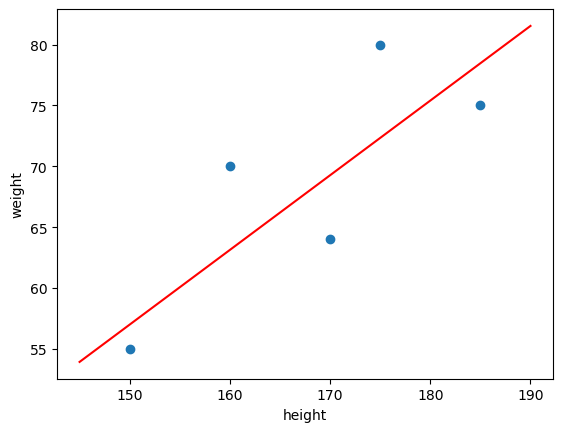

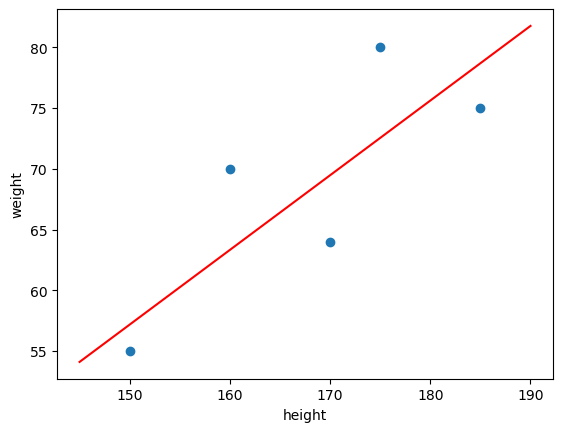

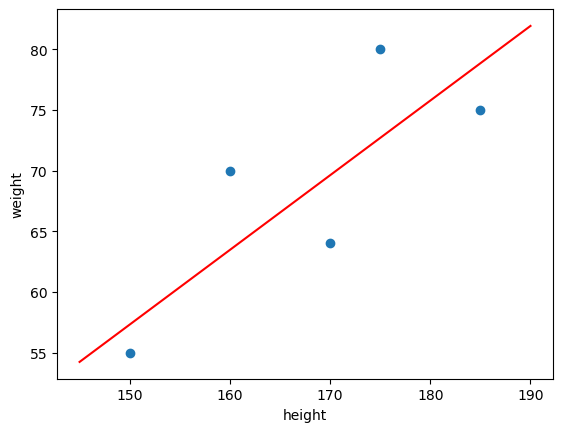

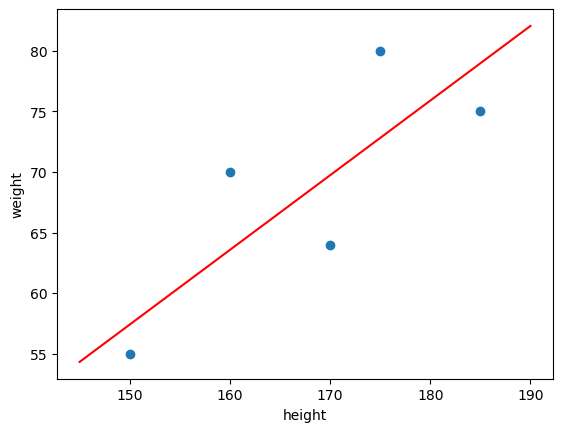

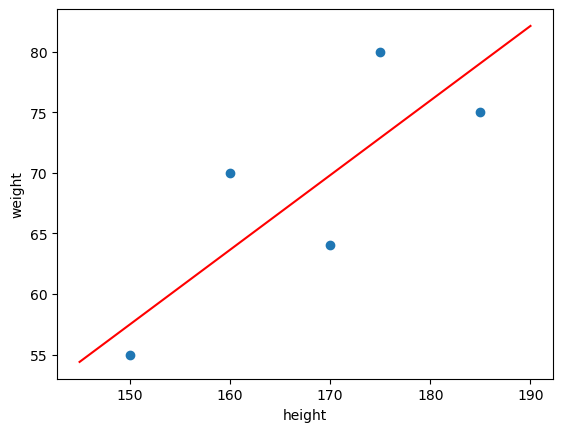

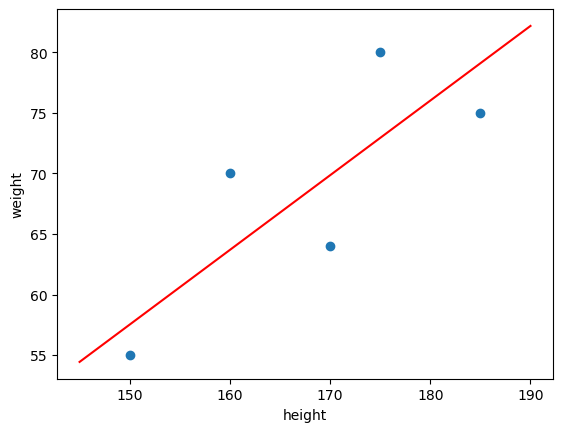

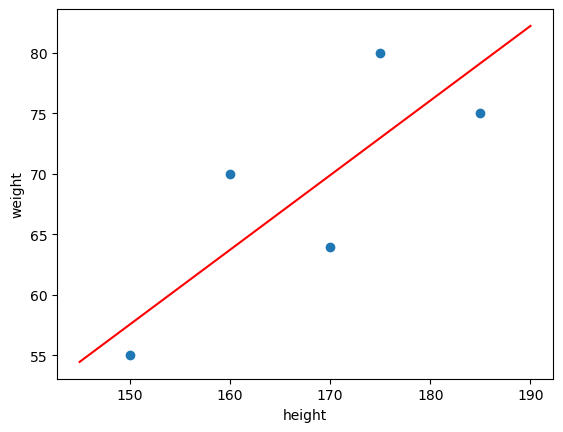

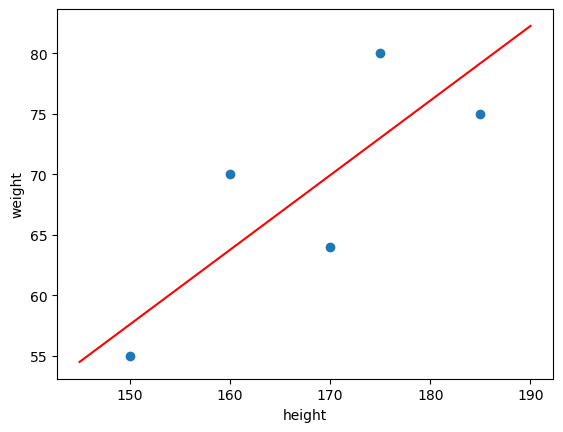

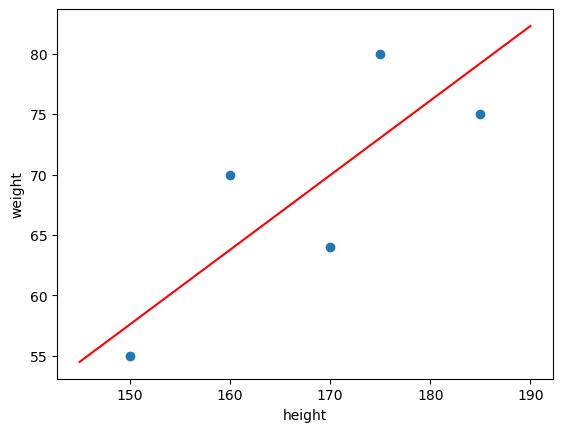

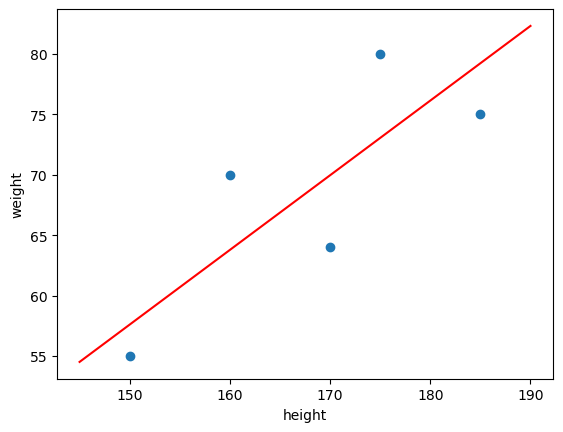

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH=20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2# loss 계산

    L.backward()# 역전파 계산 -> loss함수의 기울기 계산

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    y_plot=a * x_plot + b
    plt.figure()
    plt.plot(x,y,'o')
    plt.plot(x_plot,y_plot,'r')
    plt.xlabel("height")
    plt.ylabel("weight")

[0.44999998807907104, 0.4975450038909912, 0.5316010117530823, 0.555994987487793, 0.5734681487083435, 0.5859839916229248, 0.5949490070343018, 0.6013705134391785, 0.6059702038764954, 0.6092649102210999, 0.6116248369216919, 0.6133152842521667, 0.614526093006134, 0.6153934001922607, 0.6160146594047546, 0.6164596676826477, 0.6167783737182617, 0.6170066595077515, 0.6171702146530151, 0.6172873377799988, 0.6173712611198425]
[-35.0, -34.999717712402344, -34.999515533447266, -34.99937057495117, -34.999267578125, -34.99919128417969, -34.99913787841797, -34.99909973144531, -34.99907302856445, -34.999053955078125, -34.99903869628906, -34.999027252197266, -34.999019622802734, -34.99901580810547, -34.9990119934082, -34.99900817871094, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367]


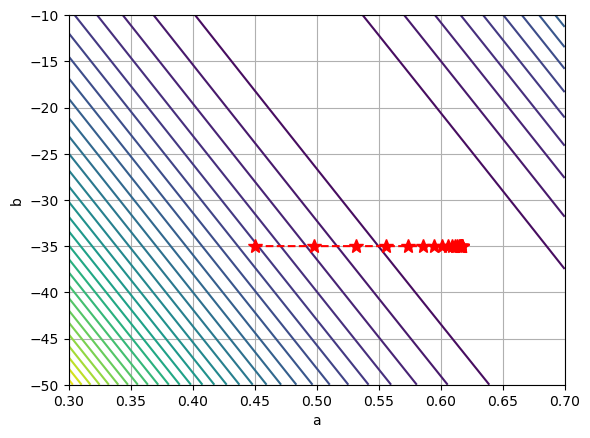

In [3]:
# history 보기 - GD
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)# 
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]# a의 변화를 저장하기 위한 리스트
b_hist=[b.detach().item()]# b의 변화를 저장하기 위한 리스트

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    a_hist += [a.item()]
    b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,"r*--",markersize=10)
print(a_hist)
print(b_hist)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)# 
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]# a의 변화를 저장하기 위한 리스트
b_hist=[b.detach().item()]# b의 변화를 저장하기 위한 리스트
print(a_hist, b_hist)

[0.44999998807907104] [-35.0]


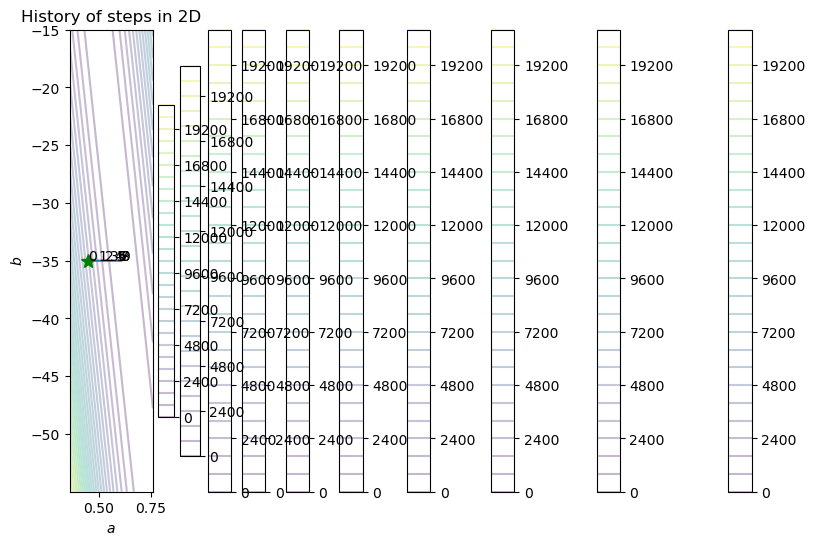

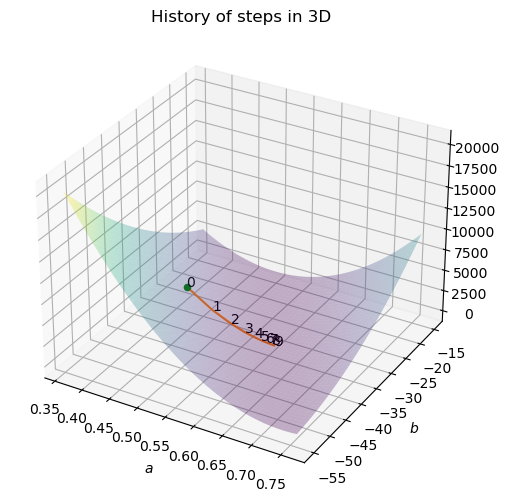

In [10]:
# from 박진현
# hyper-parameters
epoch = 10
# lr = 8 * 1e-6 # learning rate
# lr = 7 * 1e-6 # learning rate
# lr = 5 * 1e-6 # learning rate
lr = 1 * 1e-6 # perfect learning rate

# weights
a = torch.tensor(0.45, requires_grad=True) # w1
b = torch.tensor(-35., requires_grad=True) # w0

# history of weights and loss
a_history = [a.detach().item()]
b_history = [b.detach().item()]
loss_history = []

# for text in plt
ps = [i for i in range(10)]

# data
x = [150, 160, 170, 175, 185]
y = [55, 70, 64, 80, 75]

for i in range(epoch):
    a.requires_grad = True
    b.requires_grad = True

    loss = 0 # loss == L
    for xi, yi in zip(x, y):
        loss = loss + (yi - (a * xi + b))**2

    loss_history.append(loss.detach().item())
    loss.backward() # start differentiation

    a = a.detach() - lr * a.grad # a.detach(): remove 'requires_grad=True' from a. get only the value
    b = b.detach() - lr * b.grad # b.detach(): remove 'requires_grad=True' from b. get only the value

    # size of a_history, a_history, and loss should be the same.
    if i != epoch - 1:
        a_history.append(a.detach().item())
        b_history.append(b.detach().item())

# modify the following a and b if necessary
# I recommend it to change the following when you change the learning rate
a = np.mean(a_history) + np.linspace(-0.2, +0.2, 100)
b = np.mean(b_history) + np.linspace(-20, +20, 100)

A, B = np.meshgrid(a, b)

L = np.zeros_like(A)
for xi, yi in zip(x, y):
    L = L + (yi - (A * xi + B))**2

# first plot
plt.figure(figsize=(10, 6))
plt.contour(A, B, L, 30, alpha=0.3)
plt.plot(a_history, b_history)
plt.plot(a_history[0], b_history[0], "g*", markersize=10)
plt.title("History of steps in 2D")
plt.xlabel('$a$')
plt.ylabel('$b$')
for a,b,p in zip(a_history, b_history, ps):
    plt.text(a, b, str(p))
    plt.colorbar()

# second plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, L, alpha=0.3, cmap='viridis')
ax.plot(a_history, b_history, loss_history)
ax.scatter(a_history[0], b_history[0], loss_history[0], c='green')
plt.title("History of steps in 3D")
plt.xlabel('$a$')
plt.ylabel('$b$')
for a,b,l,p in zip(a_history, b_history, loss_history, ps):
    ax.text(a, b, l, str(p))
# ax.set_zlim([0, 5000])

In [3]:
print('hello world')

hello world


[0.44999998807907104, 0.46055999398231506, 0.47260066866874695, 0.48095110058784485, 0.4863082468509674, 0.4918595552444458, 0.5019830465316772, 0.5098814368247986, 0.5156798958778381, 0.5195334553718567, 0.5231543183326721, 0.5280442237854004, 0.531183123588562, 0.5388979911804199, 0.5449062585830688, 0.5473853349685669, 0.5494062900543213, 0.5516828298568726, 0.5581420660018921, 0.563165009021759, 0.5653161406517029, 0.5699717402458191, 0.5716568827629089, 0.5722748637199402, 0.5774727463722229, 0.5784862637519836, 0.5824674963951111, 0.5870410799980164, 0.5876240134239197, 0.5873190760612488, 0.5878167748451233, 0.5920627117156982, 0.5915011763572693, 0.5917125940322876, 0.5950166583061218, 0.5952406525611877, 0.5954545736312866, 0.598567008972168, 0.5976295471191406, 0.5974214673042297, 0.6010791063308716, 0.6045126914978027, 0.6043093204498291, 0.6030399203300476, 0.6057639718055725, 0.6049990653991699, 0.6042865514755249, 0.6040933728218079, 0.6073423624038696, 0.6098461151123047

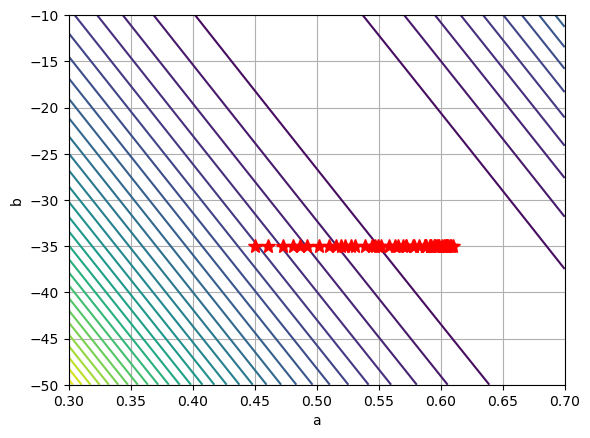

In [1]:
# history 보기 - SGD
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 10
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]
b_hist=[b.detach().item()]

for _ in range(EPOCH):

    shuffle_idx=list(range(5))
    random.shuffle(shuffle_idx)
    for i in shuffle_idx:
        a.requires_grad=True
        b.requires_grad=True

        L = (y[i] - (a*x[i]+b) )**2
        L.backward()

        a=a.detach()-LR*a.grad
        b=b.detach()-LR*b.grad

        a_hist += [a.item()]
        b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,'r*--', markersize=10)
print(a_hist)
print(b_hist)